# This notebook is part of the Coursera capstone project on accident prevention

### Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Business understanding</a></li>
        <li><a href="#ref2">Data understanding</a></li>
        <li><a href="#ref3">Data preparation</a></li>
        <li><a href="#ref4">Modelling</a></li>
        <li><a href="#ref5">Results</a></li>
        <li><a href="#ref6">Discussion</a></li>
        <li><a href="#ref7">Conclusion</a></li>
    </ol>
</div>
<br>

## Importing libraries

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pandas import DataFrame
%matplotlib inline

<a id="ref1"></a>

# Business understanding

## Background

Every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product. More than half of all road traffic deaths are among vulnerable road users: pedestrians, cyclists, and motorcyclists. Road traffic injuries are the leading cause of death for children and young adults aged 5-29 years.

Source: https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries#:~:text=Approximately%201.35%20million%20people%20die,of%20their%20gross%20domestic%20product.


## Problem

### The dataset from SDOT available to us, tells us the following details:
#### Details of accident

1. Severity of collisions: Tells us about the extent of damage - property damage, injury or fatality

2. Collision type - We understand whether the collision was head on, whether pedestrians or cyclists were involved and similar data

3. We also also analyse time of accident date and time: This reveals whether more accidents occur on weekdays or weekends and whether accidents occur more at night

#### Affected

1. No. of persons involved - Reveals whether only one person hit a non mobilized object or more people were involved
2. No. of cyclists involved in accidents were cyclists were involved
3. No. of pedestrians affected by different accidents
4. No. of vehicles involved in accidents
5. If an accident involved pedestrians, whether they were granted their way
6. No. of accidents where parked cars were hit

#### Location factors

1. Type of address: Whether more accidents occur in alleys, blocks or intersections
3. In which junction types more accidents occur

#### Human factors

1. He/she was attentive/ unattentive
2. If the person was under influence
3. If the person was speeding

#### Environmental factors

1. If rainy days cause more accidents or sunny days
2. Whether dry or wet roads cause more accidents
3. If lighting conditions are a factor in accidents

#### The aim is to understand the causes of road accidents by analysing the parameters outlined above, namely:
1. Location factors
2. Human factors
3. Environmental factors

##### Eventually we build a machine learning model to classify road accidents and predict injury collisions.

## Client

Road traffic crashes cost most countries 3% of their gross domestic product. Governments would be interested to understand the reasons behind road accidents. The aim of this project is to equip them with data driven insights to enable decision making to reduce the number of accidents.

<a id="ref2"></a>
# Data understanding

### Loading the dataset

In [3]:
df = pd.read_csv("../input/dataset/Data-Collisions.csv")
print("No. of (rows, columns) = ", df.shape )
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


No. of (rows, columns) =  (194673, 38)


### Information on the various columns as outlined in problem statement:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [5]:
k = df.isnull().sum().to_frame()
k = k.reset_index()
k.columns = ['Attribute','Count of missing values']
k = k[k['Count of missing values']>0].sort_values(by="Count of missing values", ascending=False)
k

,Attribute,Count of missing values
30,PEDROWNOTGRNT,190006
12,EXCEPTRSNDESC,189035
32,SPEEDING,185340
25,INATTENTIONIND,164868
9,INTKEY,129603
11,EXCEPTRSNCODE,109862
31,SDOTCOLNUM,79737
22,JUNCTIONTYPE,6329
2,Y,5334
1,X,5334


As we can see a lot of data is null

<a id="ref3"></a>
## Data preparation

#### Cleaning the dataset to fill in missing values and data regularization

In [6]:
#0. PEDROWNOTGRNT only Y has been entered. Assuming other values to be N
df['PEDROWNOTGRNT'].fillna("N", inplace=True) 
#1. EXCEPTRSNDESC has unimportant data and we will drop this column
#2. SPEEDING only Y has been entered. Assuming other values to be N
df['SPEEDING'].fillna("N", inplace=True)
#3. INATTENTIONIND only Y has been entered. Assuming other values to be N
df['INATTENTIONIND'].fillna("N", inplace=True)
#5. EXCEPTRSNCODE has unimportant data and we will drop this column
#6. SDOTCOLUMN is not required and we will drop it 

#16. LOCATION - cannot sustitute missing data, filling 0 for the unknown values
df['LOCATION'].fillna(0, inplace=True)

#17. ADDRTYPE, filling 0 for the unknown values
df['UNDERINFL'].fillna('0', inplace=True)

#18. ST_COLCODE, filling 0 for the unknown values
df['ST_COLCODE'].fillna(0, inplace=True)

#df.replace(np.nan, '0', inplace=True)
df.isnull().sum()

df['PEDROWNOTGRNT'].astype('str')
df['HITPARKEDCAR'].astype('str')
df['UNDERINFL'].astype('str')
df['SPEEDING'].astype('str')

df['PEDROWNOTGRNT'].replace('N','0', inplace=True)
df['PEDROWNOTGRNT'].replace('Y','1', inplace=True)
df['HITPARKEDCAR'].replace('N','0', inplace=True)
df['HITPARKEDCAR'].replace('Y','1', inplace=True)
df['UNDERINFL'].replace('N','0', inplace=True)
df['UNDERINFL'].replace('Y','1', inplace=True)
df['SPEEDING'].replace('N','0', inplace=True)
df['SPEEDING'].replace('Y','1', inplace=True)

df['UNDERINFL'] = df['UNDERINFL'].astype('int64')
df['SPEEDING'] = df['SPEEDING'].astype('int64')
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].astype('int64')
df['PEDROWNOTGRNT'] = df['PEDROWNOTGRNT'].astype('int64')

We will deal with the remaining Nan values in the dataset later

### Exploratory data analysis

Text(0.5, 1.0, 'Percentage of collisions in weekends')

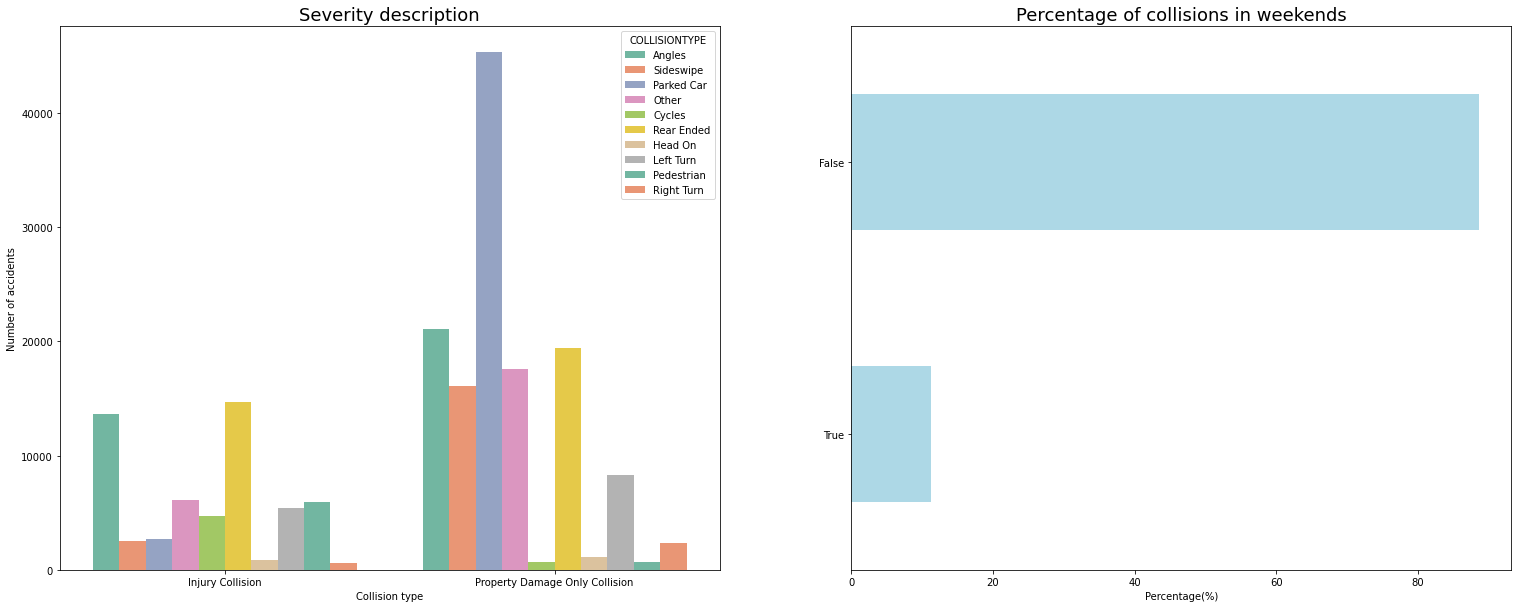

In [7]:
df['DAY'] = pd.to_datetime(df['INCDATE']).dt.dayofweek
df['WEEKEND'] = df['DAY'] > 5 
df['WEEKEND'].rename({'False':'Weekday', 'True':'Weekend'}, inplace=True)

df['DAY'] = pd.to_datetime(df['INCDATE']).dt.dayofweek
df['WEEKEND'] = df['DAY'] > 5 
df['WEEKEND'].rename({'False':'Weekday', 'True':'Weekend'}, inplace=True)

plt.figure(figsize=(26, 10))
plt.subplot(1,2,1)
sns.countplot(x="SEVERITYDESC",hue="COLLISIONTYPE", data=df, palette="Set2")
plt.title('Severity description', fontsize=18)
plt.xlabel("Collision type")
plt.ylabel("Number of accidents")

plt.subplot(1,2,2)
df['WEEKEND'].value_counts(ascending=True, normalize=True).mul(100).plot.barh(color='lightblue')
plt.xlabel("Percentage(%)")
plt.title("Percentage of collisions in weekends", fontsize=18)

#### Observations:
1. More accidents occur on weekdays
2. In injury collision, major accidents occur due to vehicles hitting another vehicle's rear end or hitting pedestrians
3. In property damage collisions, mostly parked cars are hit

### Analyzing location factors

Text(0.5, 0, 'Address type')

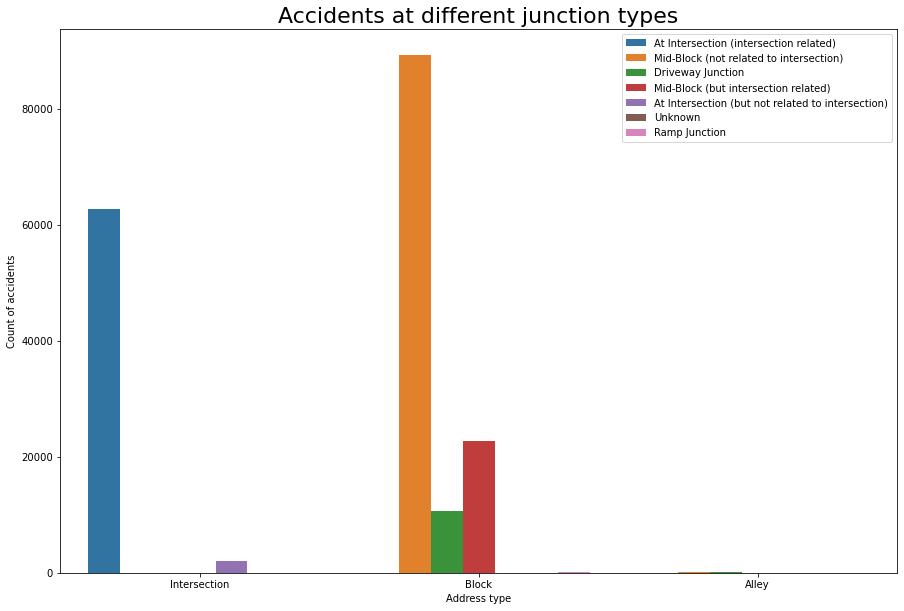

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(x="ADDRTYPE", hue="JUNCTIONTYPE", data=df )
plt.title("Accidents at different junction types", fontsize=22)
plt.legend(loc="upper right")
plt.ylabel("Count of accidents")
plt.xlabel("Address type")

Observations:
    1. Some accidents unrelated to intersections occur at intersections.
    2. In blocks, maximum accidents occur at midblock and away from intersections.
    3. Very few accidents occur at alleys.

### Analysing human factors

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

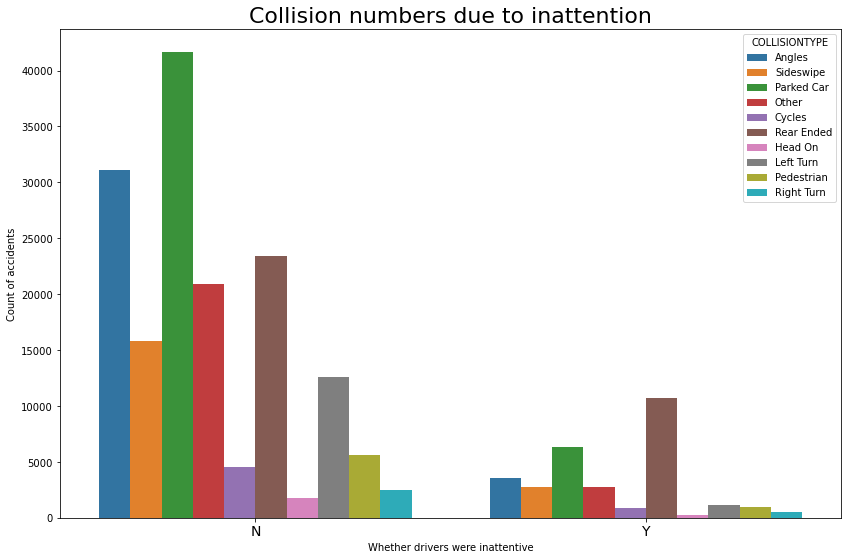

In [9]:
plt.figure(figsize=(14,9))
sns.countplot(x="INATTENTIONIND", hue="COLLISIONTYPE", data=df)
plt.title("Collision numbers due to inattention", fontsize=22)
plt.ylabel("Count of accidents")
plt.xlabel("Whether drivers were inattentive")
df['JUNCTIONTYPE'].unique()

plt.xticks(fontsize=14)

When drivers are inattentive, in maximum accidents they drive into rear end of moving vehicles. When inattentive, they generally hit parked cars.

## Analysis of attribute's characteristics which lead to collision

The problem is a binary classification problem on SEVERITYCODE:

     SEVERITYCODE of collision:
            0 - Property collision
            1 - Injury collision

### Creating our feature set

In [10]:
#drop unnecessary columns
df_feat = df.drop(['OBJECTID','SEVERITYDESC','INCDATE' , 'INCDTTM','INCKEY', 'COLDETKEY', 'REPORTNO', 'LOCATION','STATUS', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'SDOT_COLDESC','ST_COLDESC', 'DAY', 'INTKEY',  'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'HITPARKEDCAR','X','Y','SEVERITYCODE.1'],axis=1)
df_feat=df
#Splitting ADDRTYPE to Alley, block and intersection
df_feat[['Alley', 'Block', 'Intersection']] = pd.get_dummies(df_feat['ADDRTYPE'])
df_feat.drop(['ADDRTYPE'], axis=1, inplace=True)

#Splitting COLLISIONTYPE
df_feat[pd.get_dummies(df_feat['COLLISIONTYPE']).columns] = pd.get_dummies(df_feat['COLLISIONTYPE'])
df_feat.drop(['COLLISIONTYPE'], axis=1, inplace=True)

#Splitting JUNCTIONTYPE
df_feat[pd.get_dummies(df_feat['JUNCTIONTYPE']).columns] = pd.get_dummies(df_feat['JUNCTIONTYPE'])
df_feat.drop(['JUNCTIONTYPE'], axis=1, inplace=True)

#Splitting WEATHER
df_feat[pd.get_dummies(df_feat['WEATHER']).columns] = pd.get_dummies(df_feat['WEATHER'])
df_feat.drop(['WEATHER'], axis=1, inplace=True)

#Splitting ROADCOND
df_feat[pd.get_dummies(df_feat['ROADCOND']).columns] = pd.get_dummies(df_feat['ROADCOND'])
df_feat.drop(['ROADCOND'], axis=1, inplace=True)

#Splitting LIGHTCOND
df_feat[pd.get_dummies(df_feat['LIGHTCOND']).columns] = pd.get_dummies(df_feat['LIGHTCOND'])
df_feat.drop(['LIGHTCOND'], axis=1, inplace=True)

df_feat['INATTENTIONIND'] = df_feat['INATTENTIONIND'].map({'Y': '1', 'N': '0'})
df_feat['SEVERITYCODE'] = df_feat['SEVERITYCODE'].map({2: 1, 1: 0})
df_feat['INATTENTIONIND'] = df_feat['INATTENTIONIND'] .astype('int64')
#df_feat['UNDERINFL'] = df_feat['UNDERINFL'].map({'Y': 1, 'N': 0, 'nan': 0})
#df_feat['SPEEDING'] = df_feat['SPEEDING'].map({'Y': 1, 'N': 0})
df_feat['WEEKEND']  = df_feat['WEEKEND'].astype('int64') 

### Interesting findings on collision outcomes:

In [11]:
df_feat[['SEVERITYCODE', 'Intersection', 'Alley', 'Block']].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

,SEVERITYCODE,Intersection,Alley,Block
SEVERITYCODE,1.000,0.199,-0.026,-0.185
Intersection,0.199,1.000,-0.044,-0.970
Alley,-0.026,-0.044,1.000,-0.085
Block,-0.185,-0.970,-0.085,1.000


In [12]:
df_feat[['SEVERITYCODE', 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']].corr().style.background_gradient(cmap='Blues').format("{:.3f}")

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000,0.131,0.246,0.214,-0.055
PERSONCOUNT,0.131,1.000,-0.023,-0.039,0.381
PEDCOUNT,0.246,-0.023,1.000,-0.017,-0.261
PEDCYLCOUNT,0.214,-0.039,-0.017,1.000,-0.254
VEHCOUNT,-0.055,0.381,-0.261,-0.254,1.000


### Maximum injury collisions occur at intersections involving pedestrians and cyclists.

<a id="ref4"></a>
## Modelling

### Feature selection and splitting into train and test sets

In [13]:
df_feat.corr().style.background_gradient(cmap='Blues').format("{:.3f}")

Selecting the variables for feature modelling which have correlation>0.13(Top 50% of correlated attributes) with the severity of accident:

In [14]:
df_feat = df_feat[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','SDOT_COLCODE','PEDROWNOTGRNT','Intersection', 'Cycles', 'Pedestrian', 'At Intersection (intersection related)']]
X = df_feat.drop(['SEVERITYCODE'],axis=1)
y = df_feat['SEVERITYCODE']
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2)
from sklearn.metrics import accuracy_score

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
yhat_lr=lr.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)

### Support Vector Machine

In [17]:
from sklearn import svm
clf = svm.SVC(kernel = "linear")
clf.fit(X_train, y_train)
yhat_svm = clf.predict(X_test)

### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=100, criterion="entropy")
m.fit(X_train, y_train)
yhat_rfc = m.predict(X_test)

### XGBoost

In [19]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
yhat_xgb = model.predict(X_test)

<a id="ref5"></a>
## Results

In [32]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1lr = f1_score(y_test, yhat_lr)
f1dt = f1_score(y_test, yhat_dt)
f1rf = f1_score(y_test, yhat_rfc)
f1svm = f1_score(y_test, yhat_svm)
f1xgb = f1_score(y_test, yhat_xgb)

acclr = accuracy_score(y_test, yhat_lr)
accdt = accuracy_score(y_test, yhat_dt)
accrf = accuracy_score(y_test, yhat_rfc)
accsvm = accuracy_score(y_test, yhat_svm)
accxgb = accuracy_score(y_test, yhat_xgb)

plr = precision_score(y_test, yhat_lr)
pdt = precision_score(y_test, yhat_dt)
prf = precision_score(y_test, yhat_rfc)
psvm = precision_score(y_test, yhat_svm)
pxgb = precision_score(y_test, yhat_xgb)

rlr = recall_score(y_test, yhat_lr)
rdt = recall_score(y_test, yhat_dt)
rrf = recall_score(y_test, yhat_rfc)
rsvm = recall_score(y_test, yhat_svm)
rxgb = recall_score(y_test, yhat_xgb)

data = [['Model', 'Accuracy score', 'F1 score', 'Precision','Recall'],['Logistic Regression', acclr, f1lr, plr, rlr],['Decision Tree',accdt, f1dt,pdt,rdt],['Random Forest',accrf,f1rf,prf,rrf],['Support Vector Machine', accsvm, f1svm, psvm, rsvm],['XGBoost',accxgb, f1xgb, pxgb, rxgb]]
data = DataFrame(data)          
data

,0,1,2,3,4
0,Model,Accuracy score,F1 score,Precision,Recall
1,Logistic Regression,0.749994,0.36487,0.766658,0.239404
2,Decision Tree,0.752459,0.374156,0.774254,0.246682
3,Random Forest,0.752125,0.37319,0.772727,0.245997
4,Support Vector Machine,0.748478,0.306297,0.886792,0.185119
5,XGBoost,0.752639,0.35557,0.813533,0.227502


<a id="ref6"></a>
## Discussion

During the data exploration process I came across some interesting observations:
    1. Maximum accidents occur during weekdays at intersections
    2. Weather conditions do not play a significant role in accidents
    3. Road and lighting conditions have a weak correlation with accidents
    4. Being under influence doesn't cause notciceably more accidents than being inattentive
    5. Between blocks, maximum accidents occur at mid-blocks
    6. In collision accidents, maximum damage is done to parked cars
    
   In this project I have identified the relation between accidents and several human, environmental and location attributes. Maximum accidents occur at intersections related to pedestrians or cyclists. I analysed different machine learning models to classify accidents as injury or collision accidents. The "XGBoost" model offered maximum accuracy. It correctly predicted 81.35% as injury collisions. This data could be used by governments to establish separate signals for allowing pedestrians and cyclists to cross at intersections. It is also aimed at us, whether we are pedestrians, cyclists or vehicle owners to be more careful at intersections to prevent an accident.


<a id="ref7"></a>
## Conclusion

   I could achieve an accuracy of ~75% using the XGB Classifier. There are a lot of variances which have not been accounted for. However, using this project we could really narrow down to the location(intersections) where maximum accidents occur and the most affected. We also understood that there is very less importance of human and weather factors in causing an accident. The prediction could be improved by capturing real time data during accidents.